<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/LSTM_RELIANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = yf.download("RELIANCE.NS", period="5y")

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-05,1063.370361,1082.439575,1054.999634,1080.062134,1059.719360,7654392
2018-11-06,1083.727295,1101.558350,1081.349854,1093.732544,1073.132202,8716110
2018-11-07,1104.530151,1104.530151,1096.308105,1100.270508,1079.547119,1296168
2018-11-09,1095.862305,1103.341431,1074.811890,1083.182495,1062.780762,10943218
2018-11-12,1087.392578,1088.482300,1064.459961,1069.858765,1049.708252,5856714


<Axes: xlabel='Date'>

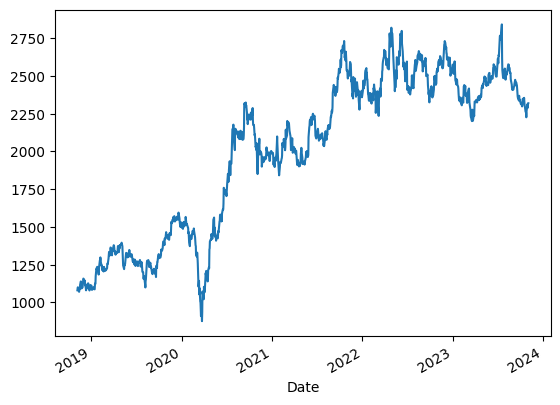

In [3]:
df.Close.plot()

In [4]:
df2 = df.Close

In [5]:
df2

Date
2018-11-05    1080.062134
2018-11-06    1093.732544
2018-11-07    1100.270508
2018-11-09    1083.182495
2018-11-12    1069.858765
                 ...     
2023-10-30    2312.500000
2023-10-31    2287.899902
2023-11-01    2297.399902
2023-11-02    2320.199951
2023-11-03    2319.699951
Name: Close, Length: 1236, dtype: float64

In [6]:
df2.reset_index(drop=True, inplace=True)

In [7]:
df2

0       1080.062134
1       1093.732544
2       1100.270508
3       1083.182495
4       1069.858765
           ...     
1231    2312.500000
1232    2287.899902
1233    2297.399902
1234    2320.199951
1235    2319.699951
Name: Close, Length: 1236, dtype: float64

In [8]:
df2.shape

(1236,)

In [9]:
df = pd.DataFrame(df2)
df

,Close
0,1080.062134
1,1093.732544
2,1100.270508
3,1083.182495
4,1069.858765
...,...
1231,2312.500000
1232,2287.899902
1233,2297.399902
1234,2320.199951


### Train Test Split

In [10]:
train = df.iloc[:1220]
test = df.iloc[1220:]

In [11]:
train.shape

(1220, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train)

MinMaxScaler()

In [15]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## Creating the Model

In [17]:
length =16
batch_size = 32


In [18]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length= length, batch_size= batch_size)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [20]:
n_features =1


In [21]:
model= Sequential()
model.add(SimpleRNN(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


<ipython-input-23-a216c16f3d95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


38/38 [==============================] - 1s 3ms/step - loss: 0.0378
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 9/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 10/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0063


### Losses - model.history.history will give you about the loss function

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss
0,0.037829
1,0.019512
2,0.012348
3,0.011113
4,0.008871
5,0.007665
6,0.006978
7,0.006370
8,0.006386
9,0.006296


<Axes: >

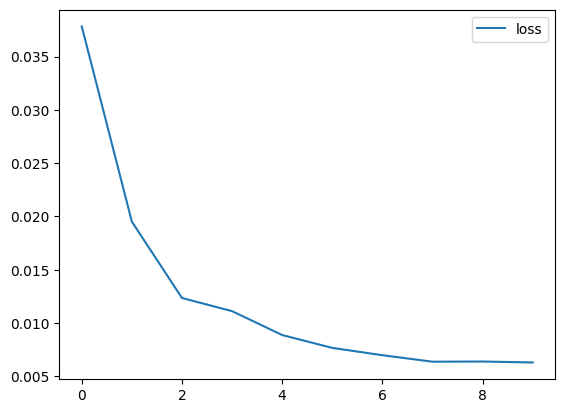

In [26]:
losses.plot()

### Evaluate Data Set

In [27]:
first_eval_batch = scaled_train[-length:]

### These are my last 16 values in dataset

In [28]:
first_eval_batch

array([[0.79380506],
       [0.76618692],
       [0.75736243],
       [0.75235246],
       [0.74497746],
       [0.74602016],
       [0.7594477 ],
       [0.7417478 ],
       [0.74729171],
       [0.73363519],
       [0.73160071],
       [0.73157538],
       [0.73355895],
       [0.72351369],
       [0.72867614],
       [0.74731717]])

In [29]:
first_eval_batch = first_eval_batch.reshape((1, length, 1))

In [30]:
first_eval_batch

array([[[0.79380506],
        [0.76618692],
        [0.75736243],
        [0.75235246],
        [0.74497746],
        [0.74602016],
        [0.7594477 ],
        [0.7417478 ],
        [0.74729171],
        [0.73363519],
        [0.73160071],
        [0.73157538],
        [0.73355895],
        [0.72351369],
        [0.72867614],
        [0.74731717]]])

In [31]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 117ms/step


array([[0.7218139]], dtype=float32)

In [32]:
test_predictions = []

In [33]:
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 16ms/step


In [34]:
test_predictions

[array([0.7218139], dtype=float32),
 array([0.7198446], dtype=float32),
 array([0.73241377], dtype=float32),
 array([0.71645296], dtype=float32),
 array([0.7158011], dtype=float32),
 array([0.70801544], dtype=float32),
 array([0.7178], dtype=float32),
 array([0.7090087], dtype=float32),
 array([0.69982946], dtype=float32),
 array([0.7006409], dtype=float32),
 array([0.7058345], dtype=float32),
 array([0.70207036], dtype=float32),
 array([0.6859175], dtype=float32),
 array([0.69224656], dtype=float32),
 array([0.69956076], dtype=float32),
 array([0.6874801], dtype=float32)]

After you get ur reqd. predictions then you may need to get the scaled value back to original value


In [35]:
true_predictions = scaler.inverse_transform(test_predictions)

In [36]:
true_predictions

array([[2294.90807344],
       [2291.03615645],
       [2315.74845566],
       [2284.36788102],
       [2283.08630463],
       [2267.77887302],
       [2287.01634724],
       [2269.7317067 ],
       [2251.68440164],
       [2253.27980956],
       [2263.49093591],
       [2256.09023066],
       [2224.33207381],
       [2236.77564623],
       [2251.15611466],
       [2227.40429462]])

In [37]:
test['predictions'] = true_predictions

<ipython-input-37-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [38]:
test

,Close,predictions
1220,2349.399902,2294.908073
1221,2349.300049,2291.036156
1222,2344.050049,2315.748456
1223,2355.250000,2284.367881
1224,2324.000000,2283.086305
1225,2306.149902,2267.778873
1226,2299.100098,2287.016347
1227,2263.199951,2269.731707
1228,2257.949951,2251.684402
1229,2226.500000,2253.279810


<Axes: >

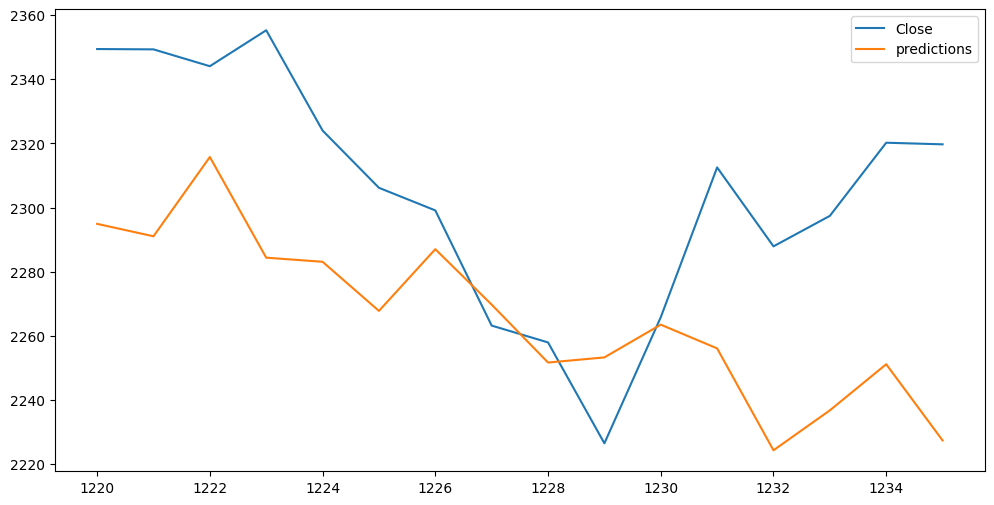

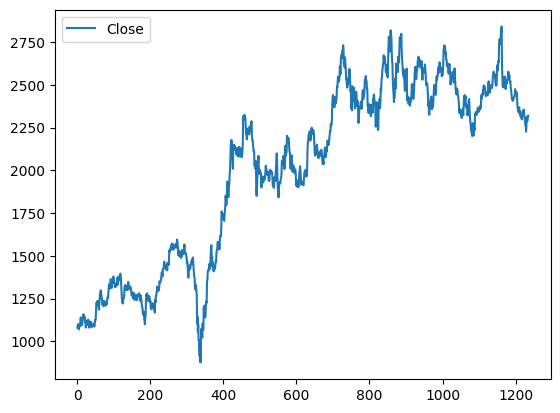

In [39]:
test.plot(figsize=(12,6))
df.plot()

### Let's create now full model


In [40]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [41]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length= length, batch_size= 32)

In [42]:
model= Sequential()
model.add(SimpleRNN(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [43]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


<ipython-input-43-a216c16f3d95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


39/39 [==============================] - 1s 3ms/step - loss: 0.0863
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0597
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0363
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 9/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 10/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0088


In [44]:
losses = pd.DataFrame(model.history.history)

<Axes: >

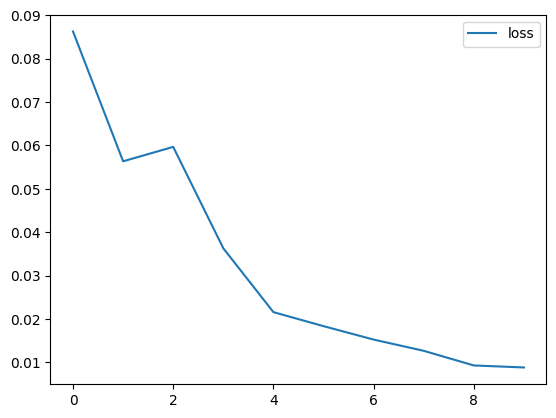

In [45]:
losses.plot()

In [46]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(20):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 15ms/step


In [47]:
forecast = scaler.inverse_transform(forecast)

In [48]:
forecast

array([[2399.66346711],
       [2404.3419944 ],
       [2420.81439957],
       [2433.75813367],
       [2430.80040629],
       [2435.43451903],
       [2432.38210312],
       [2435.97710304],
       [2448.47915266],
       [2444.98083348],
       [2443.27362747],
       [2451.55078753],
       [2444.18945771],
       [2436.33804445],
       [2436.65949325],
       [2444.35610014],
       [2452.66595587],
       [2457.45698438],
       [2463.97361754],
       [2470.39298402]])

In [49]:
forecast.flatten()

array([2399.66346711, 2404.3419944 , 2420.81439957, 2433.75813367,
       2430.80040629, 2435.43451903, 2432.38210312, 2435.97710304,
       2448.47915266, 2444.98083348, 2443.27362747, 2451.55078753,
       2444.18945771, 2436.33804445, 2436.65949325, 2444.35610014,
       2452.66595587, 2457.45698438, 2463.97361754, 2470.39298402])

In [50]:
df_array = np.array(df)
df_array

array([[1080.06213379],
       [1093.73254395],
       [1100.27050781],
       ...,
       [2297.39990234],
       [2320.19995117],
       [2319.69995117]])

In [51]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

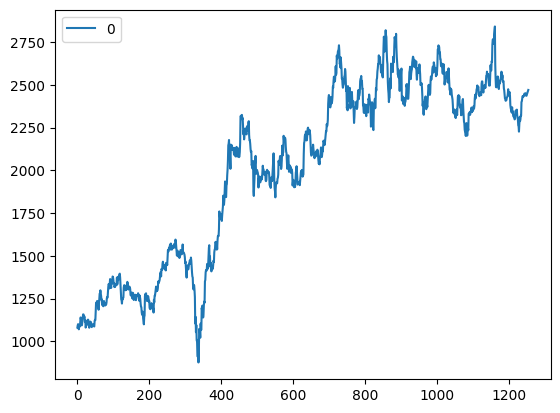

In [52]:
full_data.plot()

### LSTM

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [54]:
length =16


In [55]:
scaled_test.shape

(16, 1)

In [56]:
length =15

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=32)






In [57]:
model= Sequential()
model.add(LSTM(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [58]:
model.fit_generator(generator, epochs=20,validation_data=validation_generator, callbacks=[early_stop], shuffle=False)

Epoch 1/20


<ipython-input-58-4612b74385c1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20,validation_data=validation_generator, callbacks=[early_stop], shuffle=False)


38/38 [==============================] - 2s 15ms/step - loss: 0.0311 - val_loss: 0.0029
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0180 - val_loss: 8.2801e-05
Epoch 3/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0170 - val_loss: 5.3169e-04
Epoch 4/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0158 - val_loss: 4.1133e-05
Epoch 5/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0119 - val_loss: 1.8998e-04
Epoch 6/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0103 - val_loss: 3.0905e-04


In [59]:
losses = pd.DataFrame(model.history.history)

<Axes: >

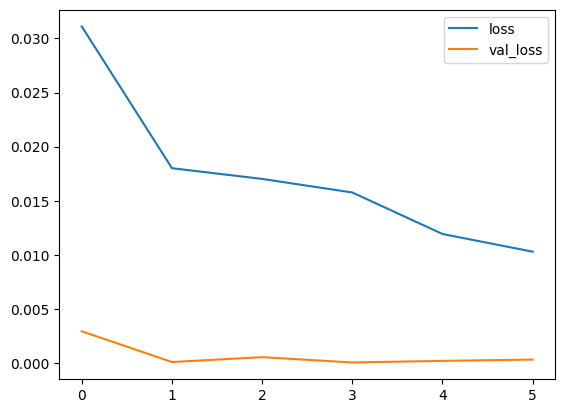

In [60]:
losses.plot()

In [61]:
len(test)

16

In [62]:



test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 40ms/step


<ipython-input-63-0c99d0b30835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

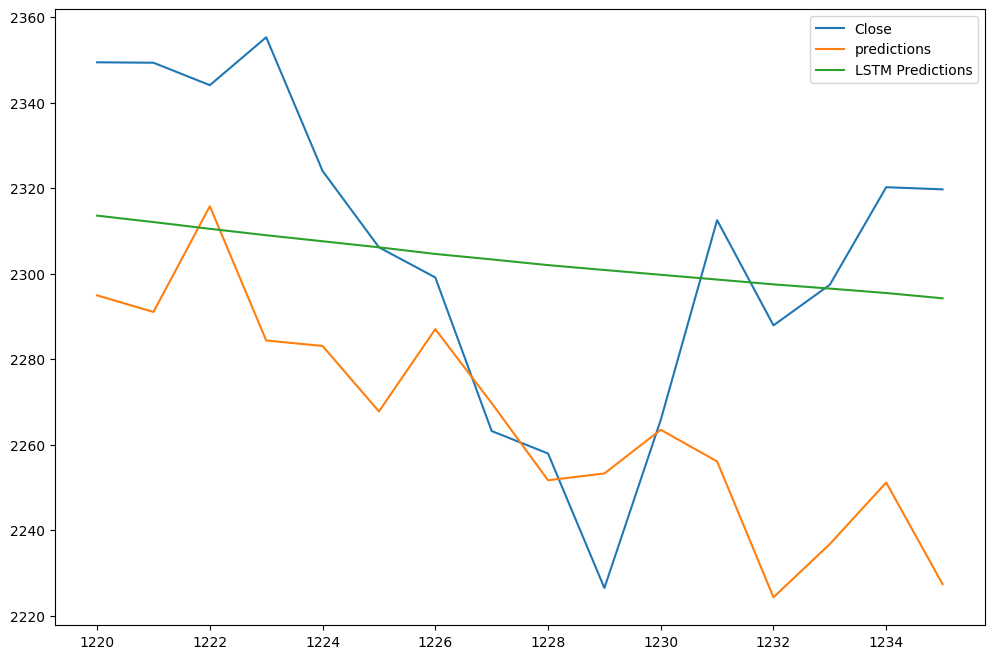

In [63]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [64]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(15):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 37ms/step


In [65]:
forecast = scaler.inverse_transform(forecast)

In [66]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

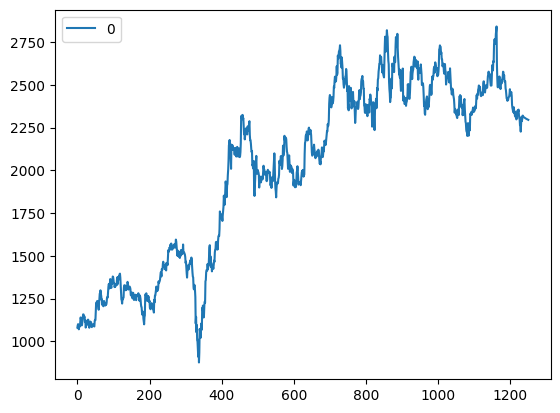

In [67]:
full_data.plot()

In [68]:
forecast

array([[2313.55268966],
       [2312.04810303],
       [2310.47273439],
       [2308.97072592],
       [2307.56364035],
       [2306.1469453 ],
       [2304.59571754],
       [2303.32000058],
       [2301.98627518],
       [2300.84638001],
       [2299.72546942],
       [2298.60866044],
       [2297.48306229],
       [2296.50160634],
       [2295.45956379]])

In [69]:
full_data.tail(10)

,0
1241,2306.146945
1242,2304.595718
1243,2303.320001
1244,2301.986275
1245,2300.846380
1246,2299.725469
1247,2298.608660
1248,2297.483062
1249,2296.501606
1250,2295.459564


### LSTM without Earlystopping

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [71]:
length =16


In [72]:
scaled_test.shape

(16, 1)

In [73]:
length =15

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=32)






In [74]:
model= Sequential()
model.add(LSTM(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [75]:
model.fit_generator(generator, epochs=20,validation_data=validation_generator, shuffle=False)

Epoch 1/20


<ipython-input-75-adc3d56421ea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20,validation_data=validation_generator, shuffle=False)


38/38 [==============================] - 4s 23ms/step - loss: 0.0177 - val_loss: 1.4207e-04
Epoch 2/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0124 - val_loss: 0.0030
Epoch 3/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0101 - val_loss: 0.0018
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 6.7931e-04
Epoch 5/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0014
Epoch 6/20
38/38 [==============================] - 0s 7ms/step - loss: 0.0069 - val_loss: 8.3335e-04
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 7.6611e-04
Epoch 8/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 8.7705e-04
Epoch 9/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0013
Epoch 10/20
38/38 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 3.9781e-04
Epoch

In [76]:
losses = pd.DataFrame(model.history.history)

<Axes: >

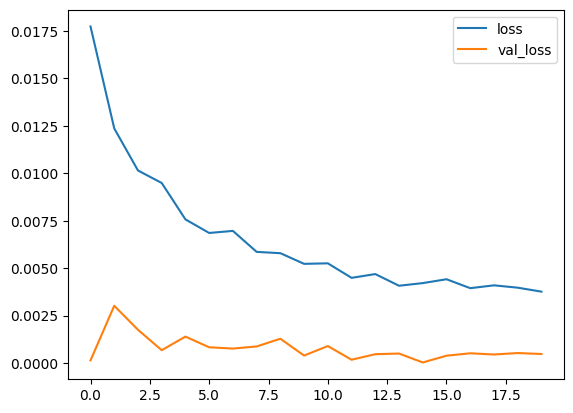

In [77]:
losses.plot()

In [78]:
len(test)

16

In [79]:



test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 16ms/step


<ipython-input-80-0c99d0b30835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

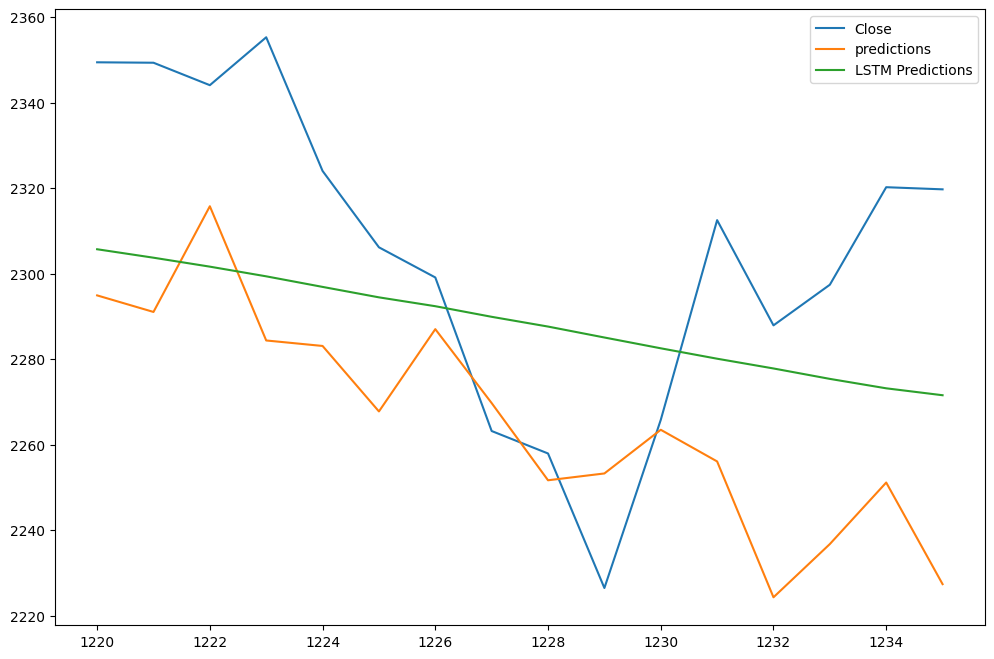

In [80]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [81]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(15):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 14ms/step


In [82]:
forecast = scaler.inverse_transform(forecast)

In [83]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

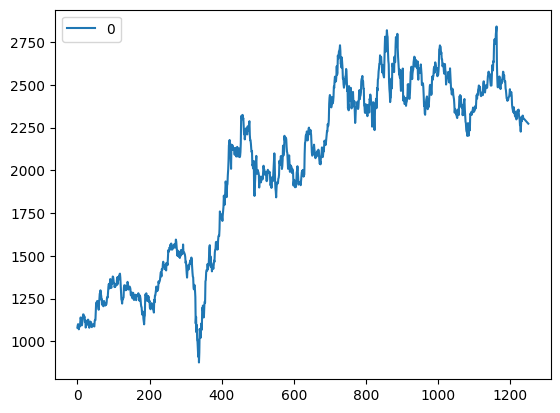

In [84]:
full_data.plot()

In [85]:
forecast

array([[2305.69529978],
       [2303.71914554],
       [2301.62756036],
       [2299.3635905 ],
       [2296.89266527],
       [2294.4503341 ],
       [2292.37937414],
       [2289.90012851],
       [2287.6199866 ],
       [2285.06386513],
       [2282.53809556],
       [2280.10560825],
       [2277.82499758],
       [2275.38817428],
       [2273.18432226]])

In [86]:
full_data.tail(10)

,0
1241,2294.450334
1242,2292.379374
1243,2289.900129
1244,2287.619987
1245,2285.063865
1246,2282.538096
1247,2280.105608
1248,2277.824998
1249,2275.388174
1250,2273.184322
